In [1]:
import numpy as np
import rasterio as rio
from rasterio import windows
import matplotlib.pyplot as plt

In [2]:
# Data
lc = rio.open("../output/lc_nl_raster.tif")
soil = rio.open("../output/soil_nl_raster_score.tif")
spatial = rio.open("../output/Spatial_Diversity.tif")
urban = rio.open("../output/Urban_Density.tif")

In [3]:
# Data bounds
bounds = lc.bounds
bounds

shape = (lc.height, lc.width)

In [6]:
# Opening the data
window_lc = windows.from_bounds(*bounds, transform=lc.transform)
lc_raster = lc.read(
    1,
    out_dtype="float32",
    window=window_lc,
    out_shape=shape,
    boundless=True,
    fill_value=lc.nodata,
)
lc_raster[lc_raster == lc.nodata] = np.nan

window_soil = windows.from_bounds(*bounds, transform=soil.transform)
soil_raster = soil.read(
    1,
    out_dtype="float32",
    window=window_soil,
    out_shape=shape,
    boundless=True,
    fill_value=soil.nodata,
)
soil_raster[soil_raster == soil.nodata] = np.nan

window_spatial = windows.from_bounds(*bounds, transform=spatial.transform)
spatial_raster = spatial.read(
    1,
    out_dtype="float32",
    window=window_spatial,
    out_shape=shape,
    boundless=True,
    fill_value=spatial.nodata,
)
spatial_raster[spatial_raster == spatial.nodata] = np.nan

window_urban = windows.from_bounds(*bounds, transform=urban.transform)
urban_raster = urban.read(
    1,
    out_dtype="float32",
    window=window_urban,
    out_shape=shape,
    boundless=True,
    fill_value=urban.nodata,
)
urban_raster[urban_raster == urban.nodata] = np.nan

In [22]:
# Combine it
combined = np.stack([lc_raster, soil_raster])
average = np.nanmean(combined, 0)
average

MemoryError: Unable to allocate 6.40 GiB for an array with shape (31820, 27000) and data type int64

In [21]:
average.shape

(2, 27000)

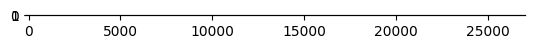

In [20]:
plt.imshow(average)